In [1]:
from mnist import MNIST
from machine_learning_framework import sigmoid, relu, tanh, gradient_descent, get_one_hot, NeuralNet, StandardScaler, NormalScaler, Metrics

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# For changes in imports to be automatically reloaded;
%load_ext autoreload
%autoreload 2

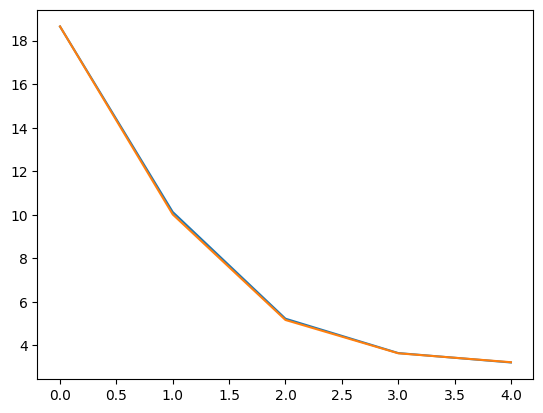

In [3]:
#__________________Multiclass Classification Example__________________
mndata = MNIST('mnist', return_type="numpy")

images_train, labels_train = mndata.load_training()
images_validation, labels_validation = mndata.load_testing()

X = images_train
Y = get_one_hot(labels_train)
Y_validation = get_one_hot(labels_validation)


scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X_validation = scaler.transform(images_validation)

layers_size = [784, 16, 10]
neural_net = NeuralNet(layers_size, NeuralNet.Type.MUTILCLASS_CLASSIFICATION,sigmoid,gradient_descent)
weights, biases, error_history, error_history_validate = neural_net.train(X, Y, 0.0001,50,0.2, X_validation, Y_validation)

prediction = neural_net.predict(X_validation)

plt.plot(error_history)
plt.plot(error_history_validate)

In [4]:
nn_metrics = Metrics(np.argmax(prediction, axis=1), labels_validation)
print(nn_metrics.get_all_as_string())

Accuracy: 0.9256, 

                True Pos: [False False  True ... False False False], 

                False Pos: [False False False ... False False False], 

                True Neg: [False False False ... False False False], 

                False Neg: [False False False ... False False False], 

                Confusion Matrix: [[ 961    0]
 [   0 1110]], 

                Per Class Accuracy: [0.9806122448979592, 0.9779735682819384, 0.9098837209302325, 0.904950495049505, 0.9490835030549898, 0.8688340807174888, 0.9509394572025052, 0.919260700389105, 0.8870636550308009, 0.8969276511397423], 

                Precision: 1.0, 

                Recall: 1.0, 

                F1 Score: 1.0, 



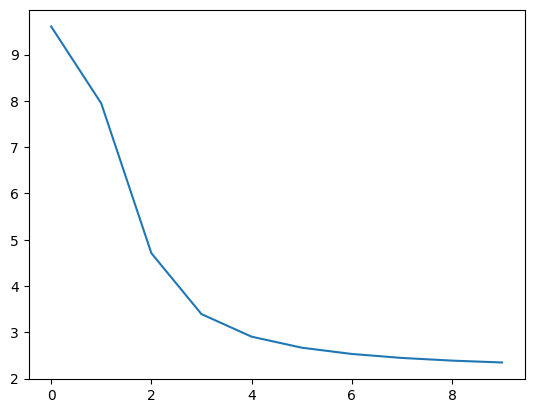

In [6]:
#__________________Binary Classification Example__________________
delivery_data = pd.read_csv("example_data/delivery_data.csv")
X_delivery = delivery_data[["motivation", "distance"]].to_numpy()
y_delivery = delivery_data[["delivery?"]].to_numpy()

scaler_delivery = StandardScaler()
scaler_delivery.fit(X_delivery)
X_delivery = scaler_delivery.transform(X_delivery)

layers_size = [2, 5, 1]
neural_net = NeuralNet(layers_size, NeuralNet.Type.BINARY_CLASSIFICATION,sigmoid,gradient_descent)
weights, biases, error_history, error_history_validate = neural_net.train(X_delivery, y_delivery, 0.01, 100,0.02)

plt.plot(error_history)

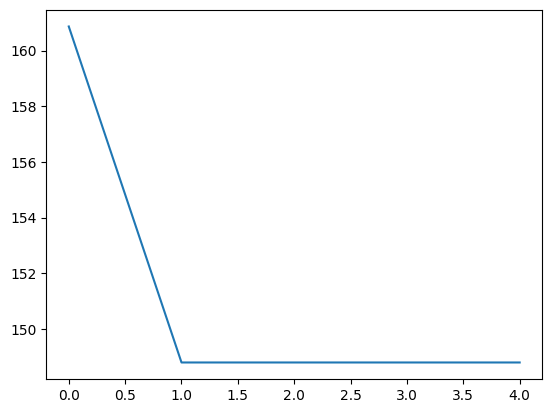

In [7]:
#__________________Regression Example__________________
pizza_data = pd.read_csv("example_data/pizzas.csv")
pizza_data = pizza_data.drop(columns="Unnamed: 0", errors="ignore") # since we did not use `pizzas_df.to_csv(..., index=False)`, Pandas added the index of the df to the csv, which becomes a new and unnamed column – here, we simply drop it if it exists

X_pizza = pizza_data[["flour","tomatoes","mozzarella","salt","diameter","delivery"]].to_numpy()
y_pizza = pizza_data[["price"]].to_numpy()

layers_size = [6, 10, 1]
neural_net = NeuralNet(layers_size, NeuralNet.Type.REGRESSION,sigmoid,gradient_descent)
weights, biases, error_history, error_history_validate = neural_net.train(X_pizza, y_pizza, 0.01, 50,0.000001)

plt.plot(error_history)